In [65]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

from sklearn.ensemble import (GradientBoostingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier)

from sklearn.tree import DecisionTreeClassifier

#from custom_scorer_module import custom_scoring_function
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            log_loss,
                            brier_score_loss,
                            roc_auc_score)

from sklearn.model_selection import (train_test_split,
                                    KFold,
                                    cross_val_score)

from data_cleaner_and_visualizer import (run_cv,
                                         auto_dummy,
                                         googone,
                                         plot_classification_scatter,
                                         feature_graph)
%matplotlib inline

In [5]:
df = pd.read_csv('data/churn_train.csv')

df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


Here is a detailed description of the data:

 * city: city this user signed up in phone: primary device for this user
 * signup_date: date of account registration; in the form YYYYMMDD
 * last_trip_date: the last time this user completed a trip; in the form YYYYMMDD
 * avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
 * avg_rating_by_driver: the rider’s average rating over all of their trips
 * avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
 * surge_pct: the percent of trips taken with surge multiplier > 1
 * avg_surge: The average surge multiplier over all of this user’s trips
 * trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
 * luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
 * weekday_pct: the percent of the user’s trips occurring during a weekday

In [66]:
#Import Data:
df_raw_train = pd.read_csv('data/churn_train.csv')
df_raw_test = pd.read_csv('data/churn_test.csv')
df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

#Clean, Transform, and Drop Data (both training and test data):
df_clean = googone(df_train, train = True)
df_clean_test = googone(df_test, train = False)

#If test data n_features does not match:
if df_clean_test.shape[1] != df_clean.shape[1]:
    col_test = df_clean_test.columns
    col_X = df_clean.columns
    dropThese = [col for col in col_test if col not in col_X]
    df_clean_test.drop(dropThese,axis=1,inplace=True)

#Create arrays for fitting:
y = df_clean["churn?"].values
X = df_clean.drop("churn?",axis=1).values

y_test = df_clean_test["churn?"].values
X_test = df_clean_test.drop("churn?",axis=1).values

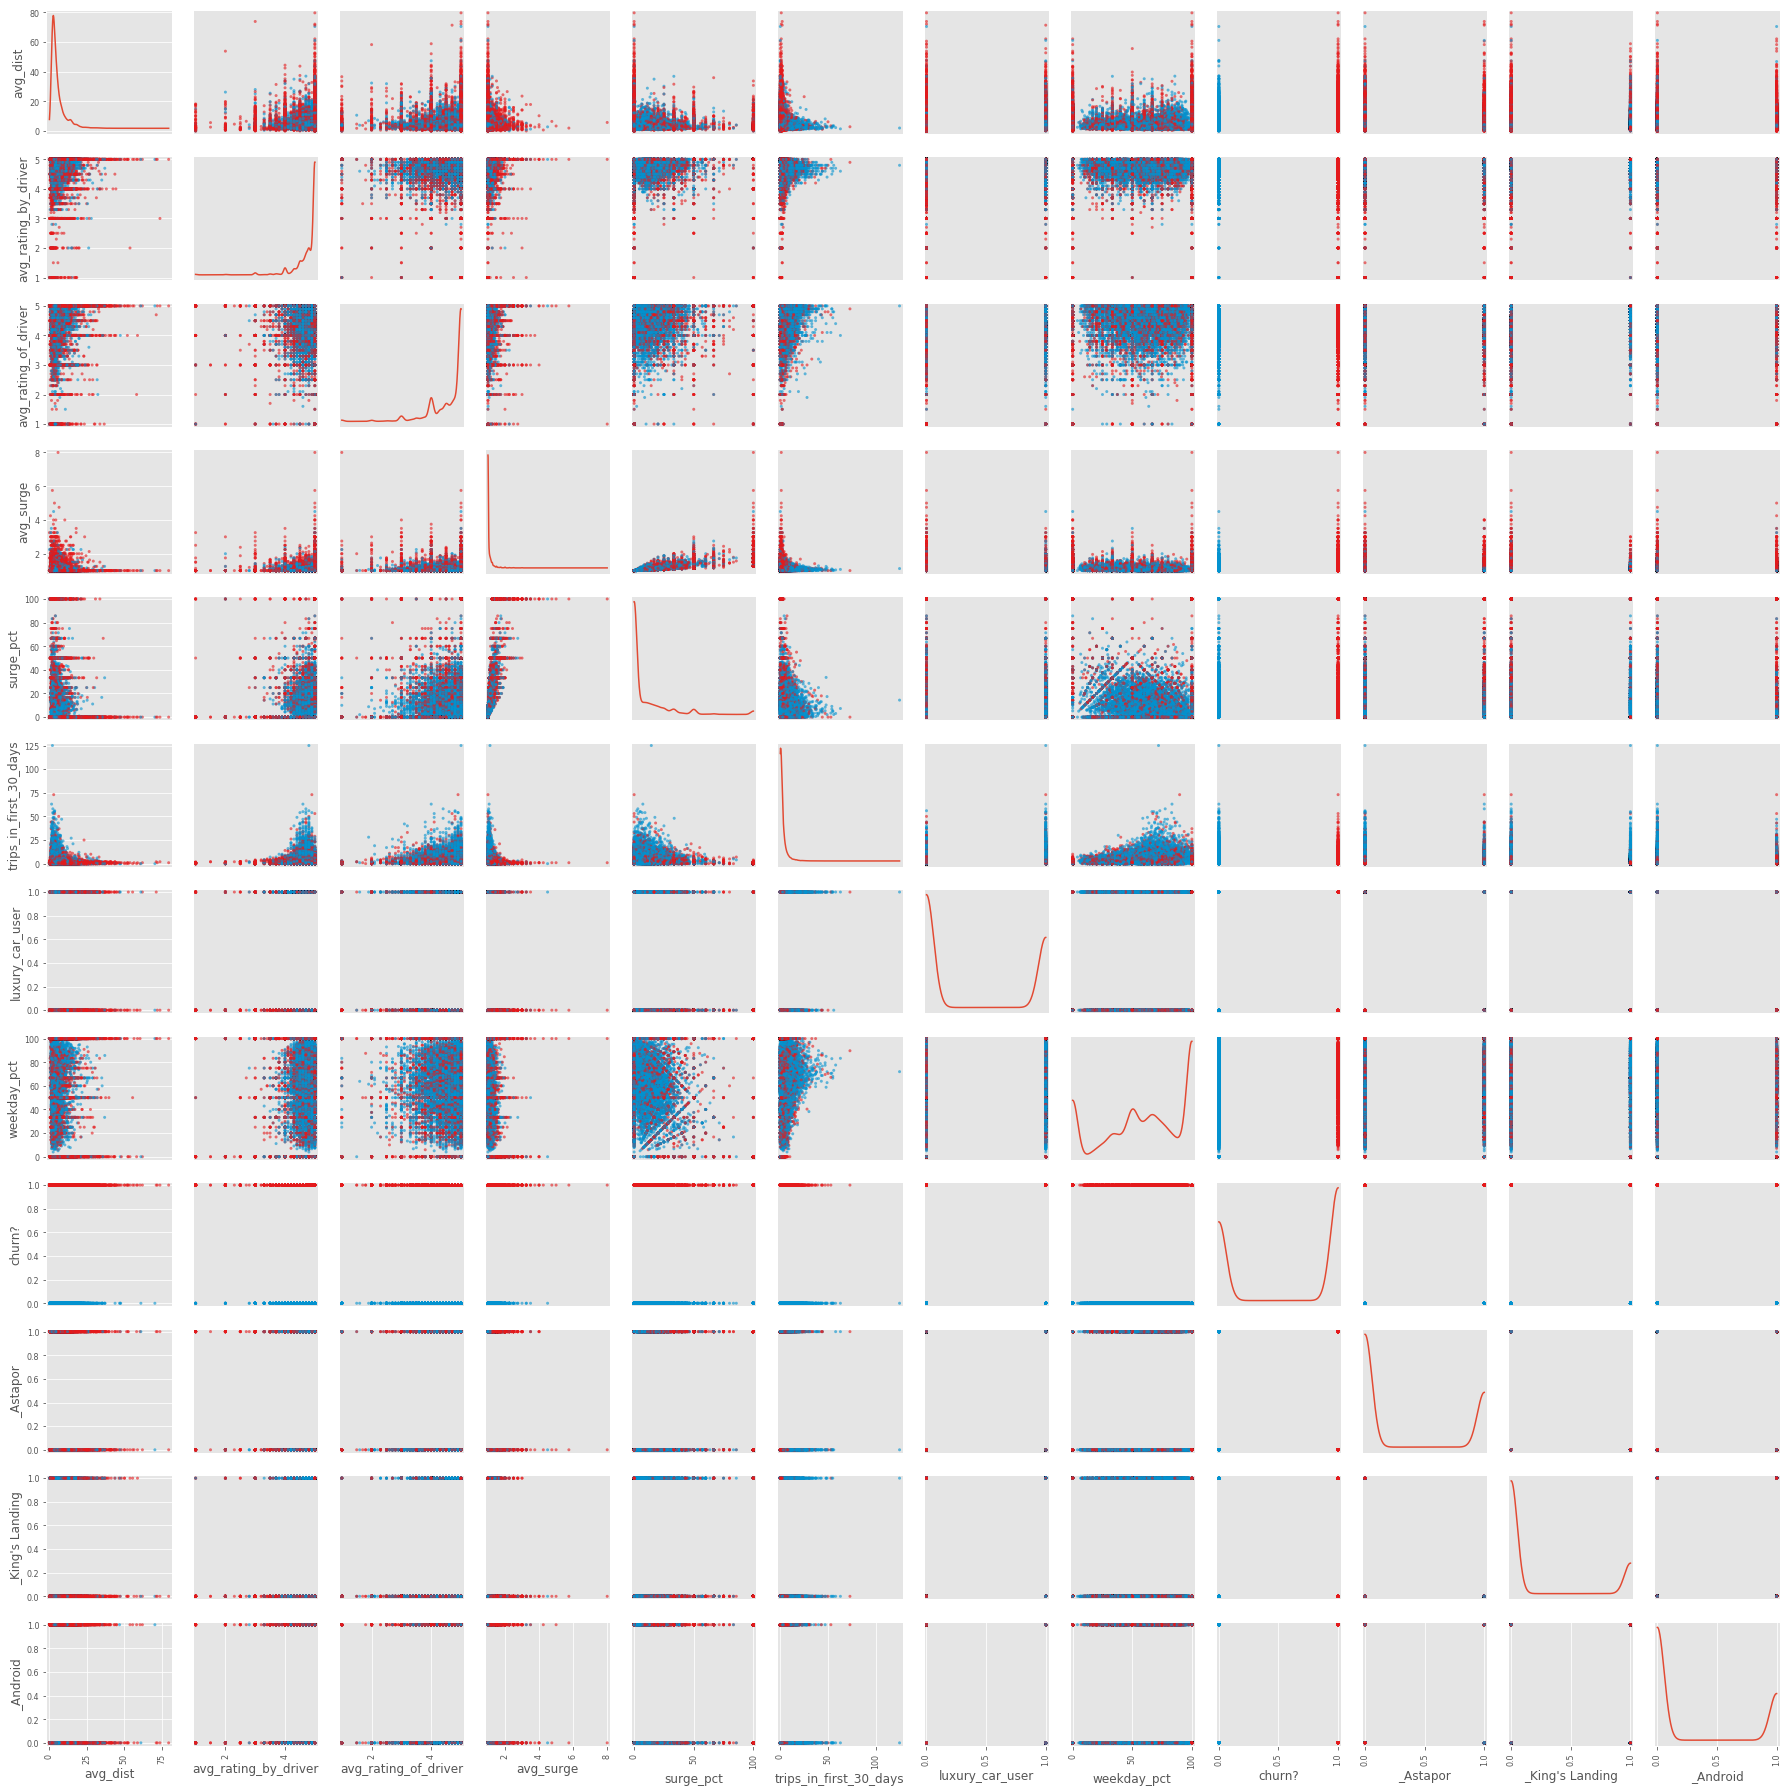

In [67]:
plot_classification_scatter(df_clean, y)